In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [28]:
# Code from https://www.tensorflow.org/tutorials/text/transformer
def get_angles(pos, i):
    return pos * i

def positional_encoding(position, d_model):
    angle_rads = get_angles(np.random.uniform(0,2*np.pi,position)[:, np.newaxis], #10x1
                          np.random.uniform(0,2*np.pi,d_model)[np.newaxis, :]) #1x64
  
  # apply sin to even indices in the array; 2i
    angle_rads[:, 0::2] = np.sin(angle_rads[:, 0::2])
  
  # apply cos to odd indices in the array; 2i+1
    angle_rads[:, 1::2] = np.cos(angle_rads[:, 1::2])
    
    pos_encoding = angle_rads
    
    return pos_encoding

def normalize_vector(input_vector):
    magnitude = np.linalg.norm(input_vector)
    return input_vector/magnitude

def gram_schmidt(input_matrix):
    columns = input_matrix.shape[1]
    row = input_matrix.shape[0]
    output_matrix = np.ones([row,columns])
    buffer_vector = input_matrix[:,0]                            ##Edge case
    for i in range(columns):
        for j in range(i):
            buffer_vector = input_matrix[:,i] - np.dot(input_matrix[:,i],output_matrix[:,j])*output_matrix[:,j]
        output_matrix[:,i] = normalize_vector(buffer_vector)     ##Normalize
    return output_matrix

In [29]:
tokens = 16
dimensions = 16

pos_encoding = positional_encoding(tokens, dimensions)
print (pos_encoding.shape)


(16, 16)


In [30]:
orthonormal_matrix = gram_schmidt(pos_encoding)
orthonormal_matrix.shape

(16, 16)

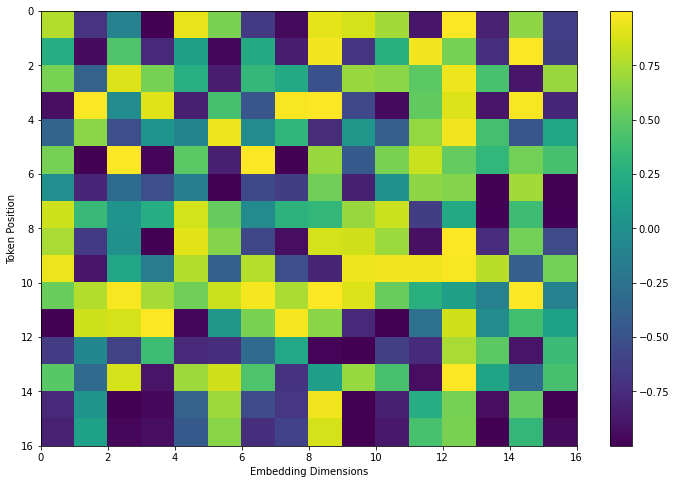

In [31]:
plt.figure(figsize=(12,8))
plt.pcolormesh(pos_encoding, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

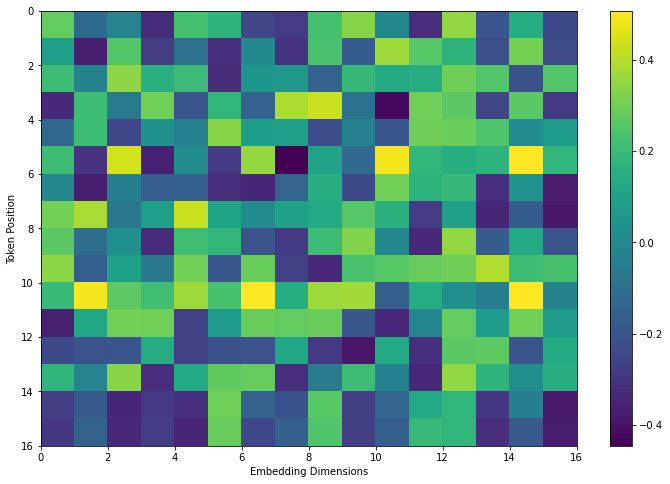

In [32]:
plt.figure(figsize=(12,8))
plt.pcolormesh(orthonormal_matrix, cmap='viridis')
plt.xlabel('Embedding Dimensions')
plt.xlim((0, dimensions))
plt.ylim((tokens,0))
plt.ylabel('Token Position')
plt.colorbar()
plt.show()

IndexError: index 16 is out of bounds for axis 1 with size 16